# Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load_breast_cancer()
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer["data"], columns = breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
df.to_csv("breast_cancer.csv", encoding = 'utf-8', index = False)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,...,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,...,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,...,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,...,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,...,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,...,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,...,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...
562,15.22,30.62,103.40,716.9,0.10480,...,1.1700,0.2356,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,...,0.6599,0.2542,0.2929,0.09873,0


# Data Cleaning - Whether any row has NULL value, if yes then diplay True

In [2]:
df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
                           ...  
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target                     False
Length: 31, dtype: bool

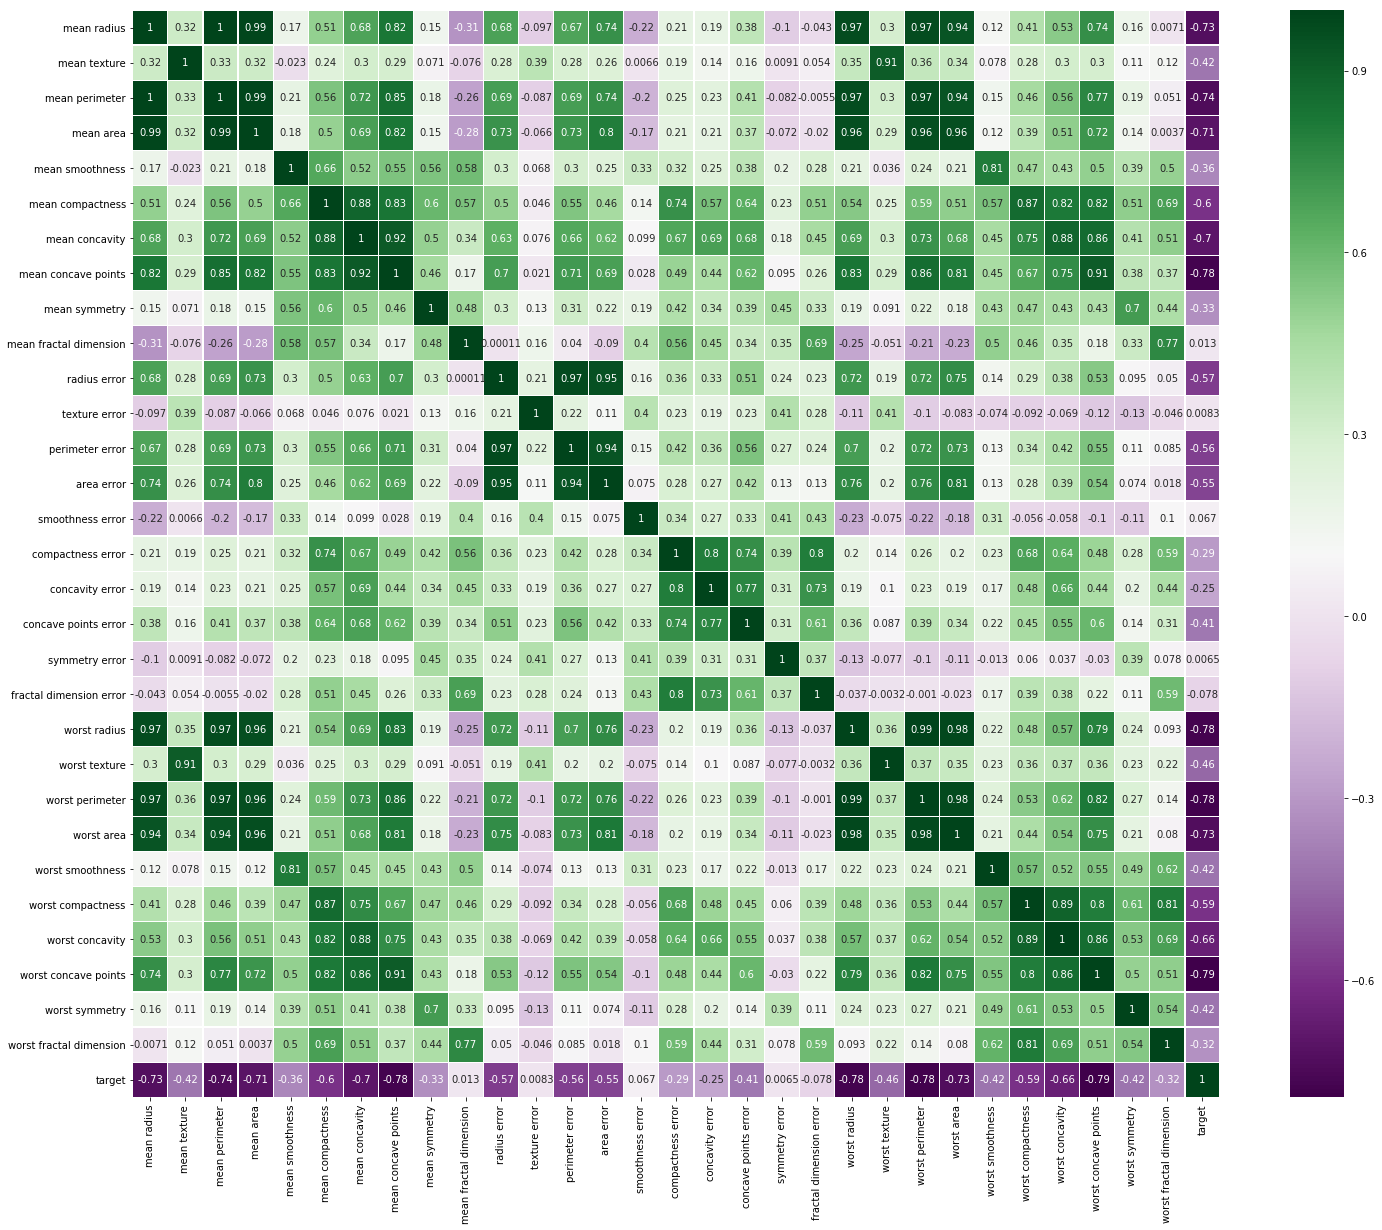

In [3]:
%matplotlib inline

plt.figure(figsize=(25,20))
sns.heatmap(df.astype(float).corr(), cmap = 'PRGn', linewidths = 0.1, square = True, linecolor = 'white', annot = True)

Choose the color => https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

The coefficient scores below -0.7 are much related to the breast cancer.

In [4]:
df.columns.shape[0]

31

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# Perform Test and Train split <br>
## I am going to adopt all of columns excluded target as Features to Predict breast cancer

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(breast_cancer['data'], breast_cancer['target'], 
                                                                    test_size = 0.33, random_state = 324)

# Approach#1 DecisionTreeClassifier approach (Supervised)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(data_train, target_train)

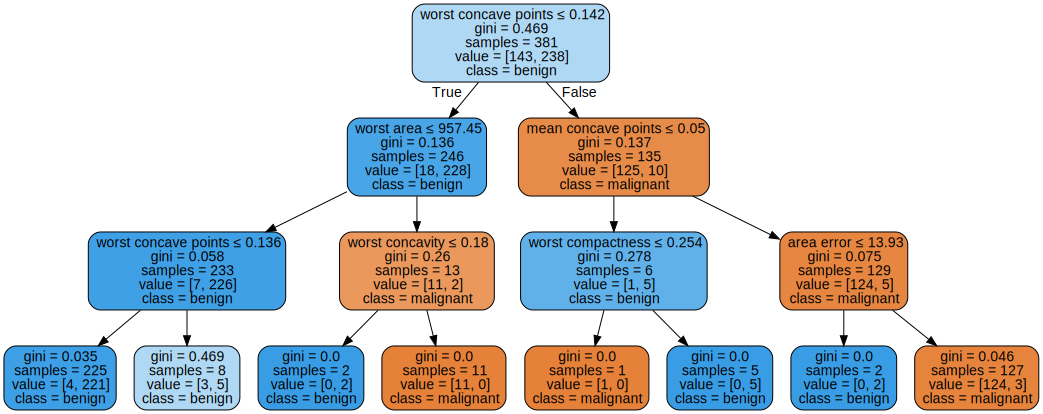

In [8]:
from sklearn.tree import export_graphviz
import graphviz
tree_pattern = export_graphviz(clf, out_file = None, 
                               feature_names = breast_cancer['feature_names'], 
                               class_names = breast_cancer['target_names'], 
                               filled = True, rounded = True,
                               special_characters = True)
g = graphviz.Source(tree_pattern)
g.render('breast_cancer_graphviz') #Export to PDF
g

### Confusion Matrix for DecisionTreeClassifier

In [9]:
from sklearn.metrics import confusion_matrix
result_clf = confusion_matrix(clf.predict(data_test), target_test)
pd.DataFrame(result_clf)

,0,1
0,60,2
1,9,117


### Accuracy score for DecisionTreeClassifier

In [10]:
from sklearn.metrics import accuracy_score
print("Predict:", list(clf.predict(data_test)))
print("True:", list(target_test))
print('Accuracy Score:', accuracy_score(clf.predict(data_test), target_test) * 100, "%")

Predict: [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
True: [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [11]:
#or write in this way
accuracy_score(y_pred = clf.predict(data_test), y_true = target_test)

0.9414893617021277

# Approach#2 KNN algorithm (Supervised)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kclf = KNeighborsClassifier(n_neighbors = 3)
kclf = kclf.fit(data_train, target_train)

### Cufsion matrix for KNN

In [13]:
from sklearn.metrics import confusion_matrix
result_kclf = confusion_matrix(kclf.predict(data_test), target_test)
pd.DataFrame(result_kclf)

,0,1
0,61,2
1,8,117


### Accuracy score for KNN

In [14]:
from sklearn.metrics import accuracy_score
print("Predict:", list(kclf.predict(data_test)))
print("True:", list(target_test))
print('Accuracy score:', accuracy_score(kclf.predict(data_test), target_test) * 100, "%")

Predict: [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
True: [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

# Approach#3 KMeans algorithm (Unsupervised)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_train) # Due to it is unsupervised, don't need 'target_train'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Cufsion matrix for KMeans 

In [16]:
from sklearn.metrics import confusion_matrix
result_kmeans = confusion_matrix(kmeans.predict(data_test), target_test)
pd.DataFrame(result_kmeans)

,0,1
0,30,119
1,39,0


### Accuracy score for KMeans

In [17]:
print("Predict:", list(kmeans.predict(data_test)))
print("True:", list(target_test))
print('Accuracy score:', accuracy_score(kmeans.predict(data_test), target_test) * 100, "%")

Predict: [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
True: [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

[0.6972646156059464, 0.6728663978657781, 0.533753360908508, 0.5120588504057626]
[2, 3, 4, 5]


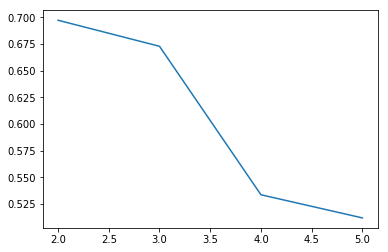

In [18]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
ks = []

for i in range (2,6):

    kmeans = KMeans(n_clusters= i)
    kmeans.fit(breast_cancer['data'])
    scores.append(silhouette_score(breast_cancer['data'], kmeans.labels_))
    ks.append(i)

print(scores)
print(ks)

plt.plot (ks, scores)

In this plot, we can notice machine judge there are two clusters (when k= 2~3 has a high value). This is make sense since we have benign and malignant in the classify.